IMFL, JK, exc03

4 Data Generation with QDA (8 points)

In [1]:
import sklearn
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def train_test_split(data, target, images, test_size=0.3, random_state=0):
    """
    Randomize given data set and split in test and training set.
    """
    # Get test size
    test_size = int(data.shape[0] * test_size)

    # Set seed
    np.random.seed(random_state)

    # Permutation
    p = np.random.permutation(data.shape[0])    
    test_p = p[:test_size]
    train_p = p[test_size:]
    
    return data[train_p], data[test_p], target[train_p], target[test_p], images[train_p], images[test_p]

In [25]:
def data_preparation(digits, test_percentage = 0.33, random_seed=0):
    """
    This function filters the digits (1, 7) from the dataset and randomly splits it in train and test set.
    """
    data = digits["data"]
    target = digits["target"]
    images = digits["images"]
    
    # Data filering 
    num_1, num_2 = 1,5
    mask = np.logical_or(target == num_1, target == num_2)
    data = data[mask]/data.max()
    target = target[mask]
    images = images[mask]
    
    # Relabel targets
    #target[target == num_1] = 0
    #target[target == num_2] = 1
    
    # Random split
    x_training, x_test, y_training, y_test, img_training, img_test = train_test_split(data, 
                                target, images, test_size=test_percentage, random_state=random_seed)    
    
    return x_training, x_test, y_training, y_test, img_training, img_test

In [26]:
# Load data
digits = load_digits()

# Filering data 
x_training, x_test, y_training, y_test, img_training, img_test = data_preparation(digits, 0.33, 0)

In [27]:
y_test

array([1, 5, 1, 1, 1, 5, 1, 1, 5, 5, 1, 5, 5, 5, 5, 1, 1, 1, 5, 5, 1, 5,
       1, 5, 1, 1, 1, 5, 5, 1, 5, 5, 5, 1, 1, 5, 5, 1, 1, 1, 1, 5, 1, 1,
       1, 5, 1, 5, 5, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 1, 5, 1,
       5, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 5, 5, 5, 1,
       5, 5, 1, 1, 5, 5, 5, 1, 5, 5, 1, 5, 1, 1, 5, 1, 5, 5, 5, 5, 1, 5,
       1, 1, 5, 1, 5, 1, 1, 1, 5, 5])

In [28]:
img_test[0]

array([[ 0.,  0.,  0.,  1., 10., 16.,  8.,  0.],
       [ 0.,  1.,  8., 15., 16., 16.,  9.,  0.],
       [ 0., 10., 16., 13., 11., 16.,  8.,  0.],
       [ 0.,  1.,  4.,  0., 10., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 12., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 16.,  3.,  0.],
       [ 0.,  0.,  0.,  0., 10., 16.,  7.,  0.]])

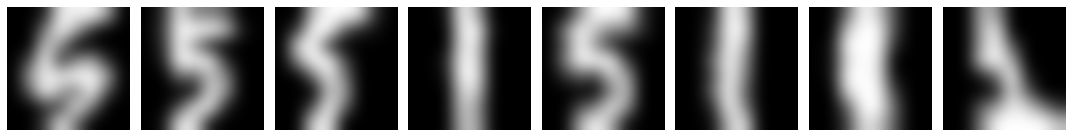

In [29]:
img = img_training[:8]
#assert 2 == len(img.shape)

fig, axes = plt.subplots(1, 8, figsize=(15, 5), tight_layout=True)

for i in range(8):
    axes[i].imshow(img[i], cmap="gray", interpolation="bicubic")
    axes[i].set_axis_off()

plt.show()

In [30]:
def fit_qda(training_features, training_labels):
    """
    This function compute for each class: mean, covariance matrix and priors
    
    input training_features: N_training x 2 numpy array 
    input training_labels: N_training x 1 numpy array
    output: mu: N_labels x 2
    output: cov: N_labels x 2 x 2
    output: p: N_labels x 1
    """ 
    mu, cov, p = [], [], []
    for label in np.unique(training_labels):
        # filtering the correct class
        data = training_features[training_labels == label]
        
        # mean
        mean = np.mean(data, axis=0)
        mu.append(mean)
        
        # Covariance 
        # Computed as in textbook
        # data_centered = data - mean
        # cov.append(np.dot(data_centered.T, data_centered)/data.shape[0])
        
        # as numpy oneliner
        cov.append(np.cov(data.T))
        
        # Prior
        p.append(data.shape[0]/training_features.shape[0])
        
    return mu, cov, p

In [31]:
# Fit QDA
mu, cov, p = fit_qda(x_training, y_training)

In [32]:
gen_inst = []
for i in range(2):
    gen_inst.append(np.random.multivariate_normal(mu[i], cov[i], 8).reshape((8,8,8)))

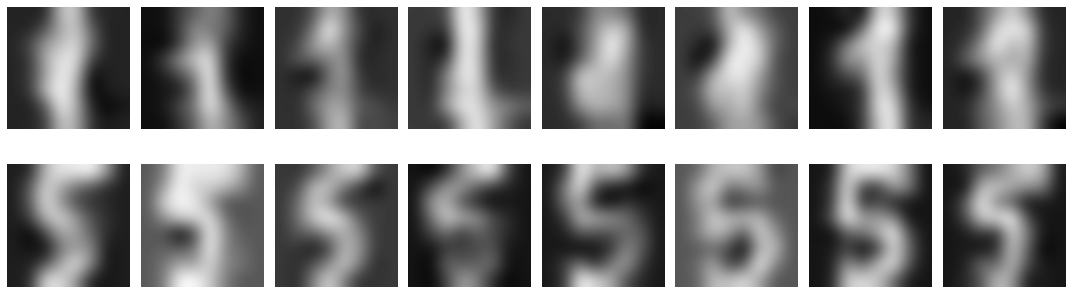

In [33]:
fig, axes = plt.subplots(2, 8, figsize=(15, 5), tight_layout=True)

for i in range(2):
    for j in range(8):
        axes[i][j].imshow(gen_inst[i][j], cmap="gray", interpolation="bicubic")
        axes[i][j].set_axis_off()

plt.show()